# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style to white
sns.set_style("white")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [4]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'
df = pd.read_csv(url, sep=',')

### Step 3. Assign it to a variable titanic 

In [5]:
titanic = df
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [7]:
titanic.set_index('PassengerId', inplace=True)

### Step 5. Create a pie chart presenting the male/female proportion

In [8]:
sex_counts = titanic['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

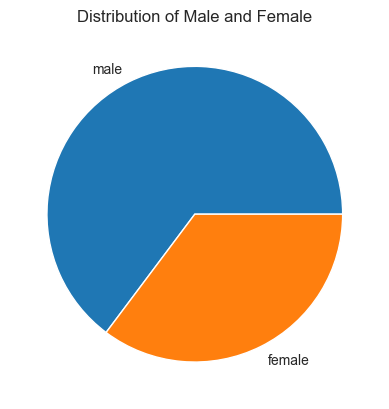

In [21]:
plt.pie(sex_counts, labels=sex_counts.index)
plt.title('Distribution of Male and Female')
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

Text(0.5, 1.0, 'Passenger Fares by Age and Gender')

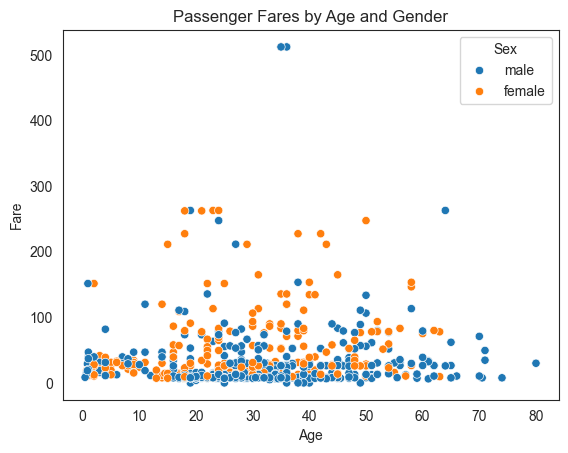

In [22]:
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=titanic)
plt.title('Passenger Fares by Age and Gender')

### Step 7. How many people survived?

In [14]:
titanic.Survived.sum()

np.int64(342)

### Step 8. Create a histogram with the Fare payed

Text(0.5, 1.0, 'Distribution of Passenger Fares')

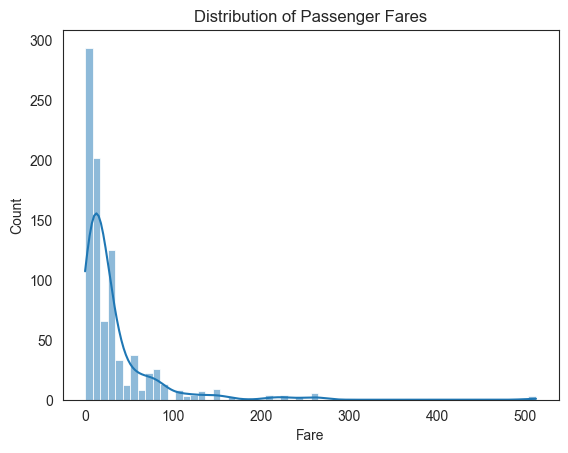

In [19]:
sns.histplot(data=titanic, x='Fare', kde=True)
plt.title('Distribution of Passenger Fares')

### BONUS: Create your own question and answer it.

In [39]:
# Find the Survival Rate by Passenger Class and Gender
result = titanic.groupby(['Pclass', 'Sex'])['Survived'].mean()
result

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [40]:
# converts Pclass and Sex index levels back into regular columns
result = result.reset_index()
result

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [41]:
result = result.rename(columns={'Survived': 'SurvivalRate'})
result

,Pclass,Sex,SurvivalRate
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [42]:
# Calculate the survival rate in percentage
result['SurvivalRate'] = (result['SurvivalRate'] * 100).round(2)
result

,Pclass,Sex,SurvivalRate
0,1,female,96.81
1,1,male,36.89
2,2,female,92.11
3,2,male,15.74
4,3,female,50.00
5,3,male,13.54


In [43]:
result = result.sort_values(['Pclass', 'Sex']).reset_index(drop=True)
result

,Pclass,Sex,SurvivalRate
0,1,female,96.81
1,1,male,36.89
2,2,female,92.11
3,2,male,15.74
4,3,female,50.00
5,3,male,13.54
